# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = " http://api.openweathermap.org/data/2.5/weather?q="
api_key = "&APPID=666c4dcbc13d170d764b8ea8089a36a0"
unit ="&units=imperial"
sample =[]
n = 0
for city in cities:
    data = requests.get(url + city + api_key + unit).json()
    sample.append(data)
    if data["cod"] == "404":
        print("city not found")
    else:
        n += 1
        print("City number " + str(n) + " " + data['name'])



City number 1 Mar del Plata
City number 2 Atuona
City number 3 Leningradskiy
City number 4 Bredasdorp
city not found
City number 5 Port Alfred
City number 6 Cape Town
City number 7 Dingle
City number 8 Ushuaia
City number 9 Busselton
City number 10 Narsaq
City number 11 Rikitea
City number 12 Ribeira Grande
City number 13 Kaitangata
city not found
City number 14 Bethel
City number 15 Kodiak
City number 16 Khatanga
City number 17 Adrar
City number 18 Puerto Ayora
City number 19 Abu Dhabi
City number 20 Yellowknife
City number 21 Norman Wells
City number 22 Qaanaaq
City number 23 Brae
City number 24 Albany
City number 25 Nanortalik
City number 26 Tiksi
City number 27 Cidreira
city not found
City number 28 Ishigaki
City number 29 Buraydah
City number 30 Caravelas
City number 31 Eureka
City number 32 Aden
City number 33 Ponta do Sol
City number 34 Foix
city not found
City number 35 Punta Arenas
City number 36 Carnarvon
City number 37 Amapa
City number 38 Ferkessedougou
City number 39 Hobar

city not found
City number 308 Santiago del Estero
City number 309 Vila Franca do Campo
City number 310 Karanpura
City number 311 Sioux Lookout
City number 312 Hobyo
City number 313 Yuli
City number 314 Antofagasta
City number 315 Petropavlovsk-Kamchatskiy
City number 316 Aguimes
City number 317 Laibin
City number 318 Tayturka
City number 319 La Ronge
City number 320 Burgeo
City number 321 Biharamulo
City number 322 Panjab
City number 323 Gachala
City number 324 Gladstone
City number 325 Port Hedland
City number 326 Mubende
City number 327 Bandarbeyla
City number 328 Ketchikan
City number 329 Berezniki
City number 330 Port Moresby
City number 331 Inhambane
City number 332 La Romana
City number 333 Ostersund
City number 334 Mitchell
City number 335 Ghanzi
city not found
City number 336 High Level
City number 337 Morehead
City number 338 Clyde River
City number 339 Porto Novo
City number 340 Buga
City number 341 Christchurch
City number 342 Seymchan
City number 343 Bridlington
City numbe

In [4]:
city = []
cloud = []
country = []
date =[]
humidity = []
lat =[]
lng = []
maxtemp = []
windspeed = [] 


for item in sample:
    try:
        city.append(item["name"])
        cloud.append(item["clouds"]["all"])
        country.append(item["sys"]["country"])
        date.append(item["dt"])
        humidity.append(item["main"]["humidity"])
        lat.append(item["coord"]["lat"])
        lng.append(item["coord"]["lon"])
        maxtemp.append(item["main"]["temp_max"])
        windspeed.append(item["wind"]["speed"])
    except KeyError:
        continue



In [5]:
df= pd.DataFrame({"City": city, 
                  "Country": country, 
                  "Date": date, 
                  "Latitude": lat, 
                  "Longitude":lng,
                  "Cloudiness": cloud, 
                 "Humidity": humidity,
                 "Max Temp": maxtemp,
                 "Wind Speed": windspeed})



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
csv_export = df.to_csv("WeatherPy.csv")
df.count()

City          543
Country       543
Date          543
Latitude      543
Longitude     543
Cloudiness    543
Humidity      543
Max Temp      543
Wind Speed    543
dtype: int64

In [7]:
df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,Mar del Plata,AR,1547417427,-46.43,-67.52,0,24,79.62,5.97
1,Atuona,PF,1547417718,-9.80,-139.03,24,100,81.10,17.05
2,Leningradskiy,RU,1547417736,69.38,178.42,24,100,-17.32,8.43
3,Bredasdorp,ZA,1547416800,-34.53,20.04,32,72,68.00,2.24
4,Port Alfred,ZA,1547417422,-33.59,26.89,24,89,68.64,7.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

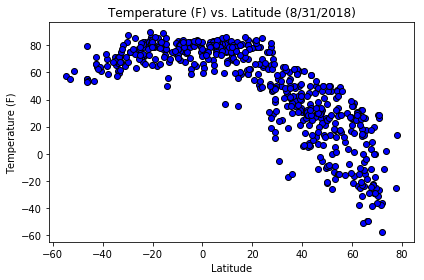

In [8]:
latvtemp = plt.scatter(df["Latitude"], df["Max Temp"], c = "blue", edgecolor = "black" )
plt.title("Temperature (F) vs. Latitude (1/13/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.savefig("lat_v_temp.png")

#### Latitude vs. Humidity Plot

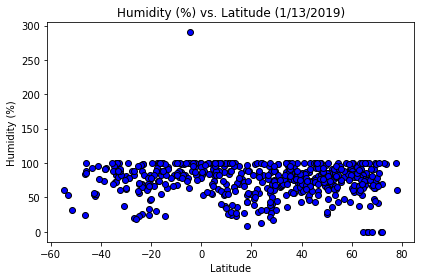

In [14]:
latvhumid = plt.scatter(df["Latitude"], df["Humidity"], c = "blue", edgecolor = "black")
plt.title("Humidity (%) vs. Latitude (1/13/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.savefig("lat_v_humid.png")

#### Latitude vs. Cloudiness Plot

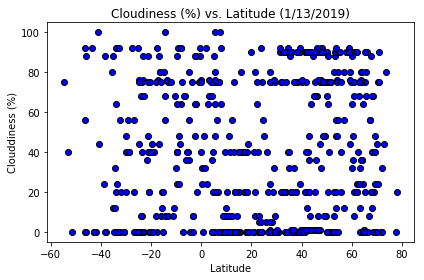

In [15]:
latvcloud = plt.scatter(df["Latitude"], df["Cloudiness"], c = "blue", edgecolor = "black" )
plt.title("Cloudiness (%) vs. Latitude (1/13/2019)")
plt.xlabel("Latitude")
plt.ylabel("Clouddiness (%)")
plt.tight_layout()
plt.savefig("lat_v_cloud.png")

#### Latitude vs. Wind Speed Plot

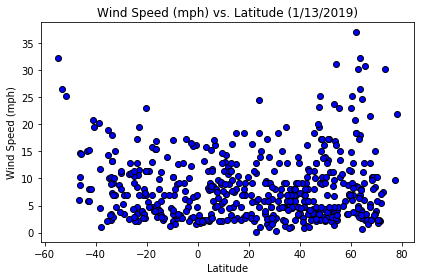

In [16]:
latvwind = plt.scatter(df["Latitude"], df["Wind Speed"], c = "blue", edgecolor = "black" )
plt.title("Wind Speed (mph) vs. Latitude (1/13/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.savefig("lat_v_wind.png")